<a href="https://colab.research.google.com/github/KimMooKeun/-/blob/main/1_1_KRX_%EC%A0%84%EC%B2%B4_%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한국거래소(KRX) 전체 종목 분석
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

    
* Pandas를 통한 파일 저장과 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd #as는 별칭을 의미 pandas별칭을 pd로 한다.
import numpy as np 
import seaborn as sns

## 데이터셋 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

* FinanceDataReader 로 수집한 전체 종목 불러오기
    * 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리
    * [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
    * [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
    * https://pandas-datareader.readthedocs.io/en/latest/readers/index.html


In [ ]:
!pip install finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 한국거래소 전체 종목 데이터 URL
url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
print(url)

http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13


In [ ]:
import FinanceDataReader as fdr

df = fdr.StockListing("KRX")
df.shape


(8110, 10)

### 일부 데이터만 가져오기

{'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
                            '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
                            '홈페이지':'HomePage', '지역':'Region', }

In [ ]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [ ]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
8105,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8106,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8107,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8108,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8109,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [ ]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다. 
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3155,52HA07,KOSPI,미래HA07엘지디스콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1130,58HB81,KOSPI,KBHB81하이브콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1589,302450,KOSPI,KBSTAR 코스피,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5532,140660,KONEX,위월드,통신 및 방송 장비 제조업,"이동위성통신안테나, 위성방송시스템",2013-12-26,12월,박찬구,http://www.wiworld.co.kr,대전광역시
4129,520030,KOSPI,미래에셋 KRX금현물 Auto-KO-C 2312-01 ETN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
5008,50H605,KOSPI,신한H605SK하이닉콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
141,395280,KOSPI,HANARO Fn K-게임,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4210,019010,KOSDAQ,베뉴지,종합 소매업,"백화점,예식장업",1993-11-05,12월,김만진.이만섭(각자 대표이사),http://www.venueg.com,서울특별시
6812,57H749,KOSPI,한국H749KOSPI200콜,NaN,NaN,NaT,NaN,NaN,NaN,NaN
6710,57H591,KOSPI,한국H591KOSDAQ150풋,NaN,NaN,NaT,NaN,NaN,NaN,NaN


## 데이터 요약하기

In [ ]:
# info 로 요약 데이터를 봅니다.
df.info() #결측치, 데이터타입 등 전체 데이터에 대한 요약정보를 알 수 있다.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8110 entries, 0 to 8109
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          8110 non-null   object        
 1   Market          8110 non-null   object        
 2   Name            8110 non-null   object        
 3   Sector          2507 non-null   object        
 4   Industry        2491 non-null   object        
 5   ListingDate     2507 non-null   datetime64[ns]
 6   SettleMonth     2507 non-null   object        
 7   Representative  2507 non-null   object        
 8   HomePage        2351 non-null   object        
 9   Region          2507 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 697.0+ KB


In [ ]:
# describe 로 기술통계값을 봅니다.
df.describe()
# unique는 중복을 제외한 고유값
# top값은 가장 자주 등장하는 빈도의 값
# freq는 최빈값에 대한 빈도수
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,8110,8110,8110,2507,2491,2507,2507,2507,2351,2507
unique,8110,3,8110,161,2332,1865,8,2388,2330,22
top,060310,KOSPI,3S,소프트웨어 개발 및 공급업,기업인수합병,1996-07-03 00:00:00,12월,-,http://www.cheryong.co.kr,서울특별시
freq,1,6404,1,152,30,8,2447,5,2,1021
first,NaN,NaN,NaN,NaN,NaN,1956-03-03 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-07-07 00:00:00,NaN,NaN,NaN,NaN


In [ ]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

Symbol            8110
Market               3
Name              8110
Sector             161
Industry          2332
ListingDate       1865
SettleMonth          8
Representative    2388
HomePage          2330
Region              22
dtype: int64

In [ ]:
# index 값 보기
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            8100, 8101, 8102, 8103, 8104, 8105, 8106, 8107, 8108, 8109],
           dtype='int64', length=8110)

In [ ]:
# 컬럼값 보기
df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [ ]:
# 값만 보기
df.values

array([['060310', 'KOSDAQ', '3S', ..., '김세완', 'http://www.3sref.com',
        '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '박대현, 손삼달',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['419890', 'KOSPI', '히어로즈 단기채권ESG액티브', ..., nan, nan, nan],
       ['429870', 'KOSPI', '히어로즈 리츠이지스액티브', ..., nan, nan, nan],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

In [ ]:
df.dtypes

Symbol                    object
Market                    object
Name                      object
Sector                    object
Industry                  object
ListingDate       datetime64[ns]
SettleMonth               object
Representative            object
HomePage                  object
Region                    object
dtype: object

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [ ]:
df


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
8105,435540,KOSPI,히어로즈 TDF2040액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8106,435550,KOSPI,히어로즈 TDF2050액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8107,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8108,429870,KOSPI,히어로즈 리츠이지스액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
# Name 컬럼 하나만 가져옵니다.
df["Name"]

0                    3S
1                AJ네트웍스
2                 AK홀딩스
3                APS홀딩스
4                 AP시스템
             ...       
8105    히어로즈 TDF2040액티브
8106    히어로즈 TDF2050액티브
8107    히어로즈 단기채권ESG액티브
8108      히어로즈 리츠이지스액티브
8109                 힘스
Name: Name, Length: 8110, dtype: object

In [ ]:
# df["Name"] 의 type을 봅니다.
type(df["Name"])

pandas.core.series.Series

In [ ]:
# 0번째 행만 가져옵니다. 행인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[0]
# object type은 문자열 형태의 타입을 의미한다.

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                        전자부품 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate        2002-04-23 00:00:00
SettleMonth                        03월
Representative                     김세완
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [ ]:
# df.loc[0] 의 type을 봅니다.
type(df.loc[0])

pandas.core.series.Series

In [ ]:
pd.Series([1,3,5])

0    1
1    3
2    5
dtype: int64

In [ ]:
pd.Series([1,3,5.0])

0    1.0
1    3.0
2    5.0
dtype: float64

In [ ]:
pd.Series([1,3,5,'문자'])

0     1
1     3
2     5
3    문자
dtype: object

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [ ]:
# df 변수의 타입을 봅니다.
type(df)


pandas.core.frame.DataFrame

In [ ]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다. 
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요. 
df[["Name","Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840
3,APS홀딩스,054620
4,AP시스템,265520
...,...,...
8105,히어로즈 TDF2040액티브,435540
8106,히어로즈 TDF2050액티브,435550
8107,히어로즈 단기채권ESG액티브,419890
8108,히어로즈 리츠이지스액티브,429870


In [ ]:
# 하나의 컬럼을 가져올 때도 []를 한번 더 감싸주면 데이터프레임 형태로 불러온다.
df[['Name']]

In [ ]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
df.loc[[0, 1, 2]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시


In [ ]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df[["Name"]]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템
...,...
8105,히어로즈 TDF2040액티브
8106,히어로즈 TDF2050액티브
8107,히어로즈 단기채권ESG액티브
8108,히어로즈 리츠이지스액티브


### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [ ]:
# 행과 열 함께 가져오기
# .loc[행, 열]
df.loc[0, 'Name']

'3S'

In [ ]:
# .loc[행, 열]
df.loc[[0, 1], ["Name", "Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570


In [ ]:
# %timeit
%timeit df.loc[0, "Name"]

The slowest run took 11.11 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 8.14 µs per loop


In [ ]:
# %timeit
%timeit df.loc[0]["Name"]

The slowest run took 6.10 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 126 µs per loop


In [ ]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0,1,2], ['Name']]

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스


In [ ]:
# 여러개의 행과 여러 개의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0,1,2], ['Name','Symbol','Region']]

,Name,Symbol,Region
0,3S,060310,서울특별시
1,AJ네트웍스,095570,서울특별시
2,AK홀딩스,006840,서울특별시


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [ ]:
# 카카오를 찾습니다.
df[df['Name'] == "카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5878,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,남궁훈,http://www.kakaocorp.com,제주특별자치도


In [ ]:
# 아모레퍼시픽 찾기
df[df["Name"] == '아모레퍼시픽']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
5122,090430,KOSPI,아모레퍼시픽,기타 화학제품 제조업,"화장품,생활용품 제조, 판매",2006-06-29,12월,"서경배, 안세홍, 이동순",http://www.apgroup.com,서울특별시


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [ ]:
# and => &
# or => |
True and False

In [ ]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Symbol", "Name"]]



,Symbol,Name
1,095570,AJ네트웍스
2,006840,AK홀딩스
58,027410,BGF
59,282330,BGF리테일
62,001460,BYC
...,...,...
8077,081660,휠라홀딩스
8088,079980,휴비스
8091,005010,휴스틸
8099,000540,흥국화재


In [ ]:
df["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [ ]:
df.loc[df["Region"].isin(["광주광역시", '부산광역시']),["Name", "Region"]]

,Name,Region
61,BNK금융지주,부산광역시
101,DRB동일,부산광역시
103,DSR,부산광역시
174,HJ중공업,부산광역시
1685,KNN,부산광역시
...,...,...
7971,한탑,부산광역시
8058,화승엔터프라이즈,부산광역시
8059,화승인더,부산광역시
8060,화승코퍼레이션,부산광역시


In [ ]:
df[df["Region"].notnull() & df["Region"].str.contains("서울|부산|인천|제주")]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
58,027410,KOSPI,BGF,기타 금융업,지주회사,2014-05-19,12월,홍정국,http://www.bgf.co.kr,서울특별시
...,...,...,...,...,...,...,...,...,...,...
8098,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
8099,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시
8102,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
8103,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [ ]:
df.loc[df["Region"].notnull() & df["Region"].str.contains("서울|부산|인천|제주"), "Region"]

0       서울특별시
1       서울특별시
2       서울특별시
5       서울특별시
58      서울특별시
        ...  
8098    서울특별시
8099    서울특별시
8102    서울특별시
8103    서울특별시
8109    인천광역시
Name: Region, Length: 1194, dtype: object

In [ ]:
df.loc[(df["Region"] == "부산광역시") & (df["Market"] == "KONEX"), ["Symbol", "Name", "Industry"]].head(10)

,Symbol,Name,Industry
5435,329020,오션스톤,"간고등어 제품, 냉동수산물 유통"
5633,379390,이성씨엔아이,원자력발전소 계측제어 서비스(경상정비)


## 파생변수 만들기

In [ ]:
# ListingYear 파생변수 만들기
df['ListingYear'] = df["ListingDate"].dt.year
df[["Name", "ListingDate", "ListingYear"]]

,Name,ListingDate,ListingYear
0,3S,2002-04-23,2002.0
1,AJ네트웍스,2015-08-21,2015.0
2,AK홀딩스,1999-08-11,1999.0
3,APS홀딩스,2001-12-04,2001.0
4,AP시스템,2017-04-07,2017.0
...,...,...,...
8105,히어로즈 TDF2040액티브,NaT,NaN
8106,히어로즈 TDF2050액티브,NaT,NaN
8107,히어로즈 단기채권ESG액티브,NaT,NaN
8108,히어로즈 리츠이지스액티브,NaT,NaN


In [ ]:
# nan은 not a number의 약자로 결측치를 의미합니다.
type(np.nan)

float

## 데이터 시각화 툴 소개

<img src="https://rougier.github.io/python-visualization-landscape/landscape-colors.png">

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 데이터 시각화를 위한 폰트설정

In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.1 MB/s 


In [ ]:
import koreanize_matplotlib

### 폰트 설정 확인하기

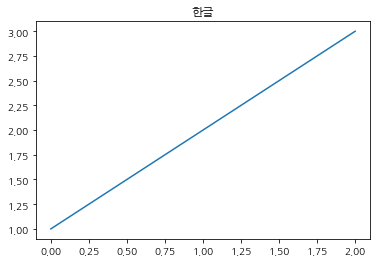

In [ ]:
# 한글폰트 확인하기
pd.Series([1,2,3]).plot(title = '한글')

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [ ]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.
df["Market"].unique

<bound method Series.unique of 0       KOSDAQ
1        KOSPI
2        KOSPI
3       KOSDAQ
4       KOSDAQ
         ...  
8105     KOSPI
8106     KOSPI
8107     KOSPI
8108     KOSPI
8109    KOSDAQ
Name: Market, Length: 8110, dtype: object>

In [ ]:
# value_counts()로 빈도수를 구합니다.
df["Market"].value_counts()

KOSPI     6404
KOSDAQ    1583
KONEX      123
Name: Market, dtype: int64

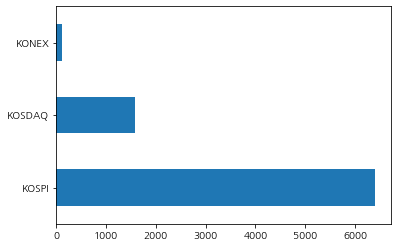

In [ ]:
# 빈도수를 시각화 합니다.
df["Market"].value_counts().plot(kind="barh")

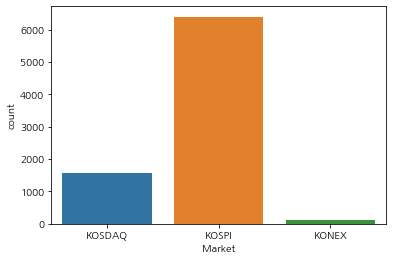

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
sns.countplot(data = df, x = "Market")

### Sector

AxesSubplot(0.125,0.125;0.775x0.755)


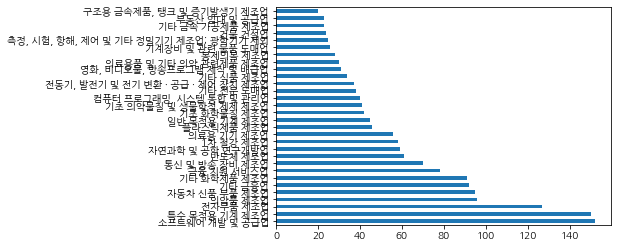

In [ ]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
# sector_count_top

sector_count_top = df["Sector"].value_counts().head(30).plot(kind = 'barh')
print(sector_count_top)

In [ ]:
# df_sector_30

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.


In [ ]:
print(plt.colormaps())

In [ ]:
# 빈도수가 가장 많은 데이터 색인하기


### Industry

In [ ]:
# Industry 의 빈도수를 구합니다.
# industry_top30

In [ ]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.


In [ ]:
# df[df["Industry"].isin(industry_top30.index)]

In [ ]:
# seaborn


### Region 

In [ ]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.


In [ ]:
# df["Region"]


In [ ]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.


In [ ]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.


In [ ]:
# Region 을 기준으로 정렬합니다.


## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기
pd.crosstab(df["Market"], df["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,5,31,1,4,4,1,6,0,2,46,...,0,3,0,3,1,1,5,9,0,0
KOSDAQ,17,530,48,41,10,31,39,6,39,549,...,9,62,2,12,16,2,70,62,4,8
KOSPI,4,147,43,19,9,21,7,0,35,426,...,16,24,0,7,12,5,25,16,1,0


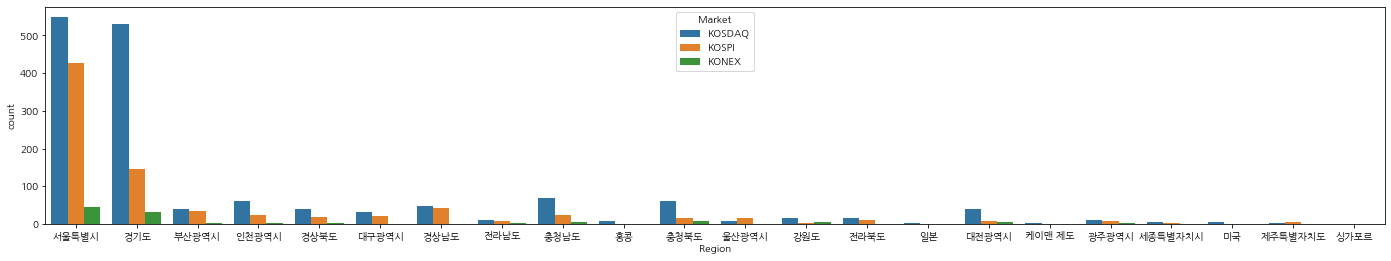

In [ ]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기
import matplotlib.pyplot as plt
plt.figure(figsize = (24, 4))
sns.countplot(data = df, x = "Region", hue = "Market")

### 연도별 상장 종목 빈도수 분석

In [ ]:
# Market, ListingYear 빈도수 구하기
# market_year


### seaborn을 통한 빈도수 시각화

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.


### Pandas를 통한 시각화

In [ ]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.


In [ ]:
# 컬럼값을 subplots 으로 그립니다.


In [ ]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그립니다.


In [ ]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
# market_year.columns


In [ ]:
# 막대(bar)그래프 그리기
# market_year


### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [ ]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
# market_year

In [ ]:
# pivot_table로 같은 결과가 나오게 연산하기


In [ ]:
# 위의 groupby 결과를 scatterplot으로 그립니다.
# df_market_year


In [ ]:
# lineplot 그리기


In [ ]:
# relplot으로 subplot 그리기 - scatter


In [ ]:
# relplot으로 subplot 그리기 - line


### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [ ]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라집니다.


## 데이터 색인

In [ ]:
# 케이맨 제도에 있는 회사 찾기


In [ ]:
# 1970년 이전에 상장한 기업을 찾습니다.


In [ ]:
# and => &
# or  => |
True and True

In [ ]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.


### 지역별 섹터

In [ ]:
# Sector, Region 으로 crosstab 연산을 합니다.
# df_sr


### 컬럼과 인덱스 값으로 색인하기

In [ ]:
# 특정 컬럼만 가져오기


### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [ ]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기


In [ ]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기


In [ ]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기



In [ ]:
# loc로 여러 행과 열 가져오기


In [ ]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.


In [ ]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.



In [ ]:
# iloc[행]
# iloc[행,열]


In [ ]:
# df.head 혹은 tail도 내부에서 iloc를 슬라이싱으로 사용하고 있습니다.
# df.head??

In [ ]:
# df_sr.tail??